# Generating images with  the OpenAI DALL-E  API
Copyright 2023 Denis Rothman, MIT License

"The software's name is a portmanteau of the names of animated robot Pixar character WALL-E and the Spanish surrealist artist Salvador Dalí."

[Read the documentation and Terms of Use BEFORE running the notebook](https://beta.openai.com/docs/guides/images/introduction)


**Generations from OpenAI documentation**<br>
"The image generations endpoint allows you to create an original image given a text prompt. Generated images can have a size of 256x256, 512x512, or 1024x1024 pixels. Smaller sizes are faster to generate. You can request 1-10 images at a time using the n parameter.

The uploaded image and mask must both be square PNG images less than 4MB in size, and also must have the same dimensions as each other. The non-transparent areas of the mask are not used when generating the output, so they don’t necessarily need to match the original image like the example above."

**Recommended Technical Requirements** <br>
1.This notebook was designed for Google Colaboratory<br>
2.This notebook runs with Google Drive

Note: you can modify the code for another environement.

#Defining Goal

In [99]:
#prompt
sequence="Creating an image of a person using a chatbot in a restaurant on a spaceship near the moon."
fname="moon_talk" #no spaces in the name of the file
gen=1         #gen==1, generate; gen==2, generate in mask;gen==3, variation

In [100]:
try:
 from PIL import Image
except:
  !pip install pillow
  import PIL

Upload the image with a mask and rename it "image_mask_png" or modify the code to fit your project. In this example an image named music.png was uploaded. The copyright for this image is :

copyright 2023, Denis Rothman

In [101]:
def convertImage():
    img = Image.open("image_mask.png")
    img = img.convert("RGBA")
 
    datas = img.getdata()
 
    newData = []
 
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
 
    img.putdata(newData)
    img.save("mask.png", "PNG")
    print("Successful")

if(gen==2):
  convertImage()

# Installing OpenAI

In [102]:
try:
  import openai
except:
  !pip install openai
  import openai

#API KEY

[Drive documentation](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
#API Key
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
#OpenAI Key in environnement
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

#Generation

In [106]:
#create image
if(gen==1):
  response = openai.Image.create(
  prompt=sequence,
  n=1,
  size="1024x1024")
  image_url = response['data'][0]['url']

# Edit

In [107]:
#edit image
if(gen==2):
  response = openai.Image.create_edit(
  image=open("image.png", "rb"),
  mask=open("mask.png", "rb"),
  prompt=sequence,
  n=1,
  size="1024x1024")
  image_url = response['data'][0]['url']

#Variation

In [108]:
#create a variation of an image
if(gen==3):
  response = openai.Image.create_variation(
  image=open("image.png", "rb"),
  n=1,
  size="1024x1024")
image_url = response['data'][0]['url']

In [109]:
print(image_url)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-h2Kjmcir4wyGtqq1mJALLGIb/user-U6tO8fV7rsroe5CVku0zFumM/img-qOGOn2lvYbqzsrHAys2h7De0.png?st=2023-04-02T12%3A28%3A22Z&se=2023-04-02T14%3A28%3A22Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-04-01T23%3A05%3A43Z&ske=2023-04-02T23%3A05%3A43Z&sks=b&skv=2021-08-06&sig=%2BxFe2/iFju8xfj%2BvT4Ua5xegYVOsBHDeuYvNRwmq3Zo%3D


#Displaying Generation

In [110]:
from PIL import Image
import requests

url = image_url
image = Image.open(requests.get(url, stream=True).raw)

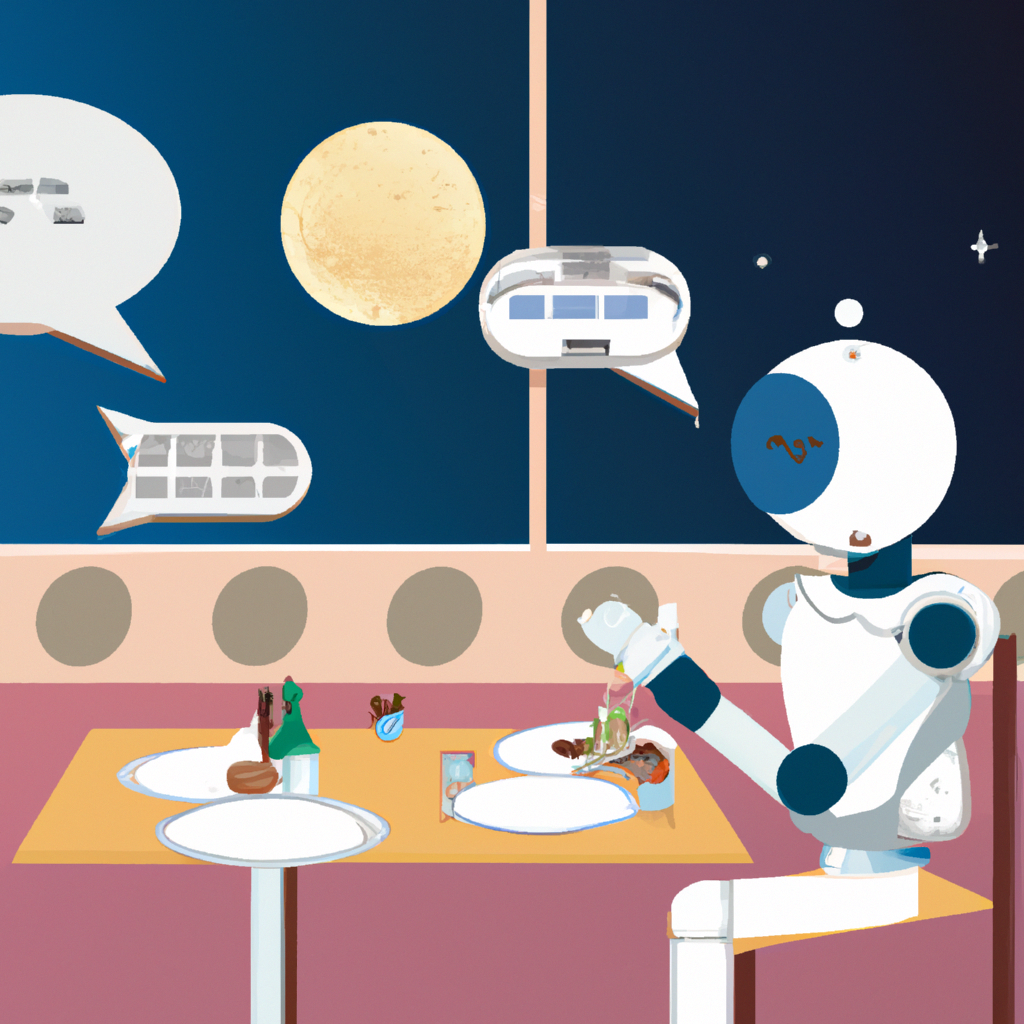

In [111]:
without_matlib=image
without_matlib

#Saving Generation to Google Drive

In [112]:
#generating a random suffix to the file name defined in the goal section
#this way if the image is regenerated with the same textand file name,
#previous versions will not be overwritten 
import random
num=random.randint(1,1000)
suffix=str(num)
sgen=str(gen)
fname=fname+suffix+"_"+sgen+".png"
print(fname)

moon_talk24_1.png


In [113]:
image.save(fname)

In [114]:
#select the file in a directory of your choice on Google Drive to store the images 
d="drive/MyDrive/OpenAI/images/" + fname
print(d)

drive/MyDrive/OpenAI/images/moon_talk24_1.png


In [115]:
!cp $fname $d